In [1]:
import numpy as np
from scipy.io import loadmat
from functions import fun_init, fun_model_results
import matplotlib.pyplot as plt

# --- 加载数据（训练集特征+标签） ---
A = loadmat('A_matlab.mat')['A_matlab']
# --- 训练 / 测试集索引 ---
total_num = 88
temp = np.arange(total_num)
M, N = 71, 17
train_idx = temp[:M]
test_idx = temp[M:M+N]

In [2]:
# -------- 1. 优选特征索引 --------
Y = loadmat('selected_feature_index.mat')['Y'][0]
Y = Y - 1
Y

array([15, 11, 16, 19,  7, 12,  1, 10,  4,  5,  0,  6,  9], dtype=uint8)

In [3]:
# -------- 2. 使用优选特征构建数据集 --------
ps_output, ps_input, p_train, p_test, t_train, t_test, T_train, T_test, _, _ = fun_init(
    A, train_idx, Y, test_idx
)

In [4]:
# -------- 3. 加载 FD2 数据（已提取好的待预测区域全特征）并选择对应特征 --------
FD2_mat = loadmat(r"FD2_data.mat")
P_valFD2 = FD2_mat['FD2_data']  # shape = (40128, 23)
P_valFD2 = P_valFD2[:, Y]
P_valFD2.shape

(40128, 13)

In [5]:
# -------- 4. 应用 mapminmax 归一化器 --------
p_valFD2 = ps_input.transform(P_valFD2)  # 使用训练集归一化器

In [8]:
# 参数设置
c = 5.43
g = 0.143

# 建模
R1, rmse1, MRE1, R2, rmse2, MRE2, model = fun_model_results(
    p_train, t_train, p_test, t_test, T_train, T_test, M, N, c, g, ps_output
)

p_valFD2

# 预测 FD2
t_simFD2 = model.predict(p_valFD2)

# 可以反归一化
# T_simFD2 = ps_output.inverse_transform(t_simFD2.reshape(-1, 1)).ravel()

# 还原为图像
FD2_predict = t_simFD2.reshape(96, 418)

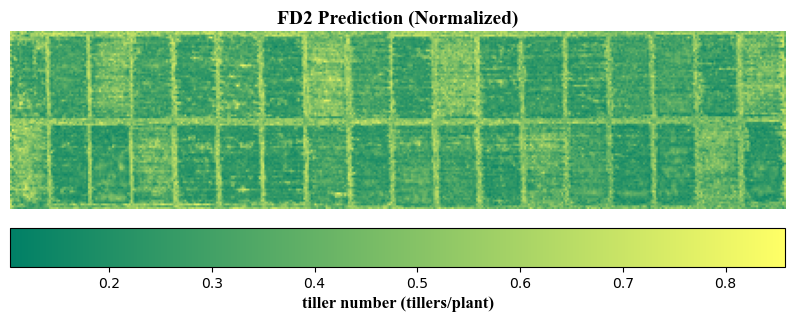

In [9]:
plt.figure(figsize=(10, 5))
plt.imshow(FD2_predict, aspect='equal', cmap='summer')  # 可自定义其他 colormap
plt.axis('off')

# 设置色条
cbar = plt.colorbar(orientation='horizontal', pad=0.05)
cbar.set_label('tiller number (tillers/plant)', fontsize=12, fontname='Times New Roman', weight='bold')

plt.title("FD2 Prediction (Normalized)", fontsize=14, fontname='Times New Roman', weight='bold')
plt.show()